Dr Tina Heger's (Dept. of Ecology TUM, Munich) experimental finding -  'Light availability experienced in the field affects ability of following generations to respond to shading in an annual grassland plant.' (https://doi.org/10.1111/1365-2745.12607)

![Pinweed](files/Erodium_cicutarium,_flower_and_seed-pod.jpg)

### Experiments produce data
###  Data has attributes
###  Data often classified as variables
### Variables often classified as dependent and independent

Last line is confusing,another way to say it, dependent is what you want to know, and independent is what you think will help you to know what you want to know. I know, still confusing!, lets say, dependent is along y-axis, and independent is along x-axis.

Lets look at one of the analysis researcher did


![Longertime to first flowering](files/Tina Heger-longer time to ﬁrst ﬂowering.png)

Lets start by looking at some 'Data' from the above experiment. 

In [4]:
# data wrangling
# read.csv ideally takes cares of data type, but some times it fails to recognize the values.
# Your NA strings in the csv file, N/A, are interpreted as character and then the whole column is converted to character(https://stackoverflow.com/questions/20060706).
greenhouse_data <- read.csv('data/Greenhouse_data_TH/het data-Table 1.csv',header = TRUE,as.is = TRUE,na.strings = "n/a")
str(greenhouse_data)

'data.frame':	863 obs. of  19 variables:
 $ plant.h          : int  1 2 3 5 6 7 8 10 11 12 ...
 $ block            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ treatment        : chr  "c" "c" "c" "c" ...
 $ position         : int  1 2 3 5 6 1 2 4 5 6 ...
 $ source.pop       : chr  "NUH" "SCH" "SSH" "SHH" ...
 $ source.pop.number: int  9 11 15 12 11 13 13 10 14 7 ...
 $ source.fam       : chr  "NUH11" "SCH15" "SSH7" "SHH5" ...
 $ field.greenhouse : chr  "G" "G" "G" "G" ...
 $ first.flower     : int  113 105 105 92 105 105 105 99 99 92 ...
 $ rosette.diameter : num  24 28.7 21 22 21.3 ...
 $ height           : num  5 10 6 8 5 6 6 7 5 4 ...
 $ leaf.length      : num  12.24 15.21 7.13 13.8 11.51 ...
 $ SLA              : num  35.6 26.1 38.9 36.7 25.8 ...
 $ branch.length    : num  NA NA NA NA NA 70 NA NA NA NA ...
 $ internode.number : chr  NA NA NA NA ...
 $ internode.length : num  NA NA NA NA NA ...
 $ biomass          : num  2.34 NA NA NA NA 2.66 NA NA NA NA ...
 $ seeds.per.fruit  : num  5 4.8 5 

Light availability experienced in the ﬁeld affects ability of following generations to respond to shading in an annual grassland plant

Lets do some summary statistics of data elements

In [5]:
summary(greenhouse_data)

    plant.h          block        treatment            position    
 Min.   :  1.0   Min.   : 1.00   Length:863         Min.   :1.000  
 1st Qu.:231.5   1st Qu.: 7.00   Class :character   1st Qu.:2.000  
 Median :451.0   Median :13.00   Mode  :character   Median :4.000  
 Mean   :451.5   Mean   :13.03                      Mean   :3.513  
 3rd Qu.:672.5   3rd Qu.:19.00                      3rd Qu.:5.000  
 Max.   :900.0   Max.   :25.00                      Max.   :6.000  
                                                                   
  source.pop        source.pop.number  source.fam        field.greenhouse  
 Length:863         Min.   : 1.000    Length:863         Length:863        
 Class :character   1st Qu.: 5.000    Class :character   Class :character  
 Mode  :character   Median : 9.000    Mode  :character   Mode  :character  
                    Mean   : 8.803                                         
                    3rd Qu.:13.000                                         


In [6]:
# Lets look at avaliable treatments
unique(greenhouse_data$treatment)

[1] "c"  "he" "ho"

In the experiment, these are the treatment groups, but what are those , and why are they here.

Lets look at the researcher real question 'I wanted to know whether these differences in responses to shading 
can be traced back to differences inlight availability in the ﬁeld'. So, to setup the scenarios so to speak, 
she needed to simulate different growing conditions c, control; he, heterogeneous shading; ho, homogeneous shading.

Open canopy (no shading, ‘control’), closed canopy (‘homogeneous shade’), and a patchy combination of shade, fully sunlit gaps, and patches of deep shade (‘heterogeneous shade’)


Finding - Time to ﬁrst ﬂowering is signiﬁcantly inﬂuenced by the light environment in the source populations

In [ ]:
# For our purpose, we will consider one question
# Time to ﬁrst ﬂowering was determined as the number of days between planting and ﬁrst ﬂowering


We have data, and we want to emulate the researcher's result. Because we have lot of observations per treatment group, we need a metric, 'mean' is commonly used, i.e. sum of observations(pick the variable of interest) divided by number of observations

In [8]:
# Note - na.rm	a logical value indicating whether NA values should be stripped before the computation proceeds.
mean.c <- mean(greenhouse_data[greenhouse_data$treatment=='c','first.flower'],na.rm=TRUE)
mean.he <- mean(greenhouse_data[greenhouse_data$treatment=='he','first.flower'],na.rm=TRUE)
mean.ho <- mean(greenhouse_data[greenhouse_data$treatment=='ho','first.flower'],na.rm=TRUE)

treatmentxflowering_means <- c(mean.c,mean.he,mean.ho)
treatmentxflowering_means

[1] 101.5909 112.1267 109.0530

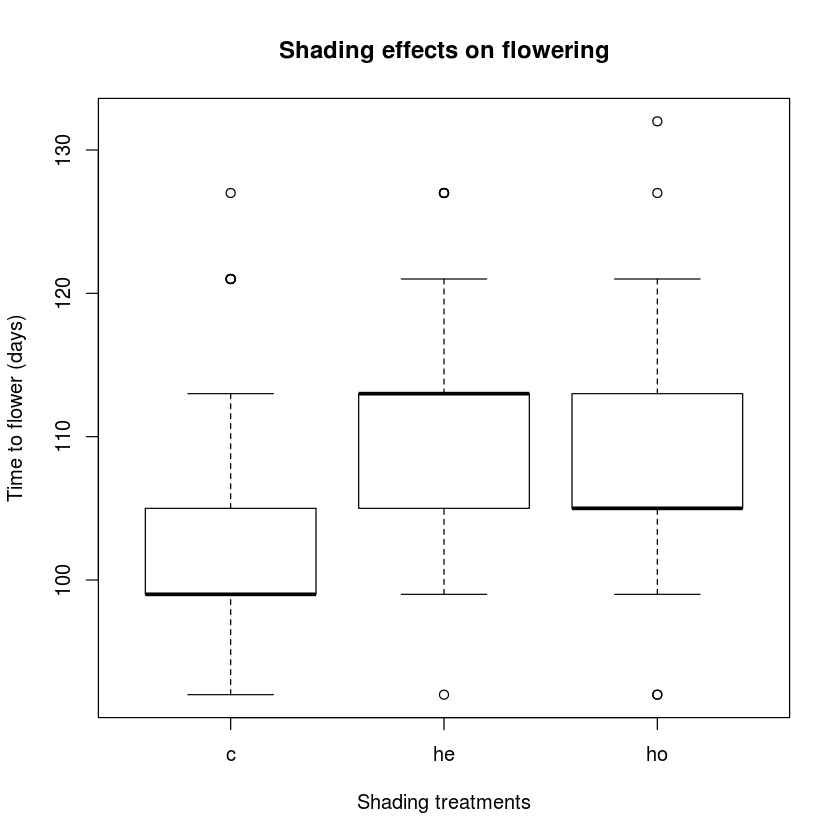

In [9]:
# Do a box plot to confirm your means
boxplot(first.flower~treatment,data=greenhouse_data, main="Shading effects on flowering", 
  	xlab="Shading treatments", ylab="Time to flower (days)")

At this stage we could state that 'he' is mostly influencing the time to flower, hence ...., but as researchers like to be confident in their findings, they attest it by doing a statistical test which gives a probability that the results were not by chance.

One such test where we have to compare two means, is t-test

In [11]:
t.test(greenhouse_data[greenhouse_data$treatment=='c','first.flower'],
       greenhouse_data[greenhouse_data$treatment=='he','first.flower'],
       alternative = "two.sided",conf.level = 0.95)


	Welch Two Sample t-test

data:  greenhouse_data[greenhouse_data$treatment == "c", "first.flower"] and greenhouse_data[greenhouse_data$treatment == "he", "first.flower"]
t = -18.643, df = 571.65, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.645768  -9.425838
sample estimates:
mean of x mean of y 
 101.5909  112.1267 


We look for two key values - p-value, for now - think that lower than .05 is better (chance of getting this result by random chance). So, we have a 'Measure of the probable truth' (O.N.Bishop) that not subjective.

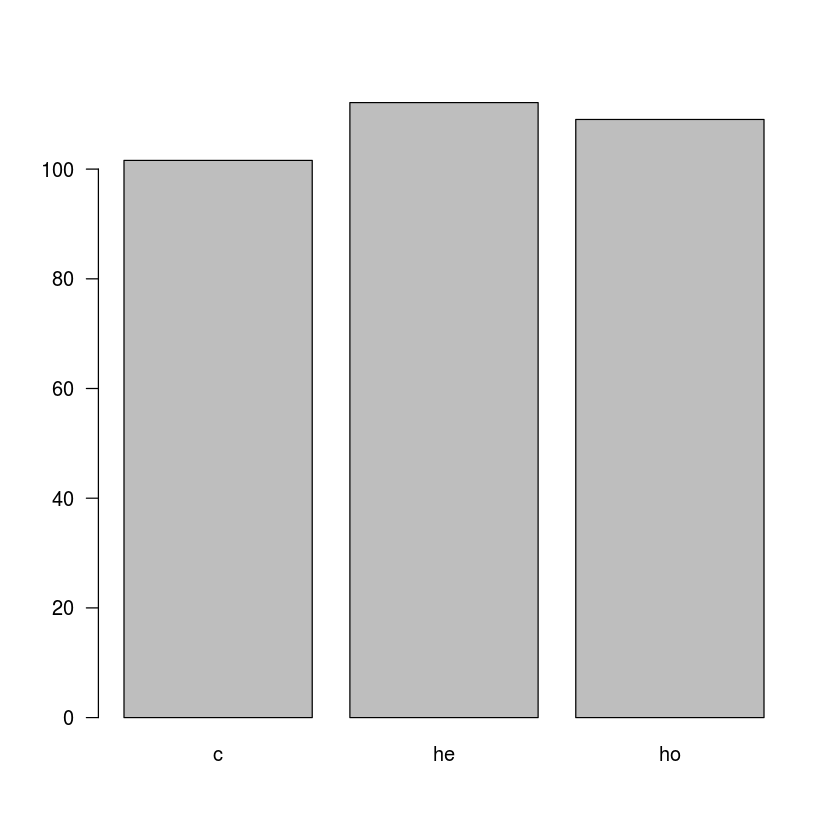

In [12]:
se <- function(x) sqrt(var(x,na.rm = TRUE)/length(x))
treatmentxflowering_se <- c(se(greenhouse_data[greenhouse_data$treatment=='c','first.flower']),
                            se(greenhouse_data[greenhouse_data$treatment=='he','first.flower']),
                            se(greenhouse_data[greenhouse_data$treatment=='ho','first.flower']))

top_SE <- max(treatmentxflowering_means+treatmentxflowering_se*2)
treatments <- c("c", "he", "ho")
barCenters <- barplot(treatmentxflowering_means, names.arg=treatments, col="gray", las=1, ylim=c(0,top_SE))

Now, the researcher also looked at height, and leaf length. Lets explore that next, shall we ?